In [240]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


## 1. Intensity Transformation

In [241]:
# Load grayscale image
Emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert Emma is not None

In [242]:
# Define transformation function

# Maps input 0–50 → output 0–50
t1 = np.linspace(0, 50, num=51).astype('uint8')
# Maps input 51–150 → output 100–255
t2 = np.linspace(100, 255, num=100).astype('uint8')
# Maps input 151–255 → output 150–255
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(np.arange(256), t, color='blue', linewidth=2)
plt.title("Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

(256,)


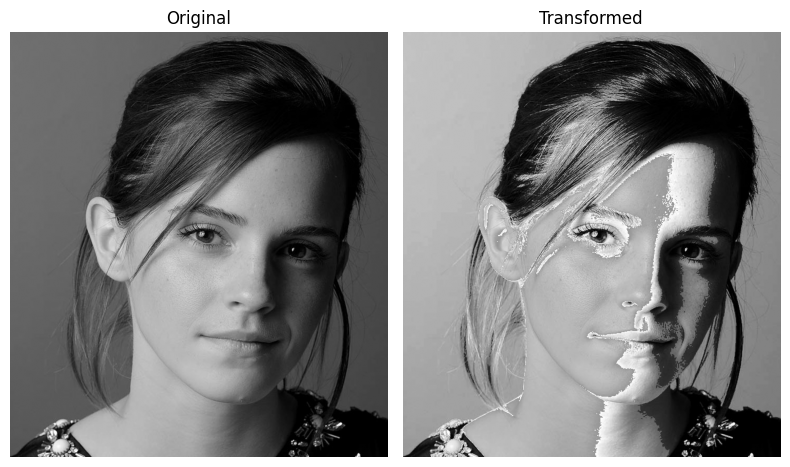

In [243]:
# Apply transformation 
g = t[Emma] # Map each pixel

# Display the image
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(Emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 2. Intensity Transformation for a Brain Proton Density Image

In [244]:
# Load grayscale image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

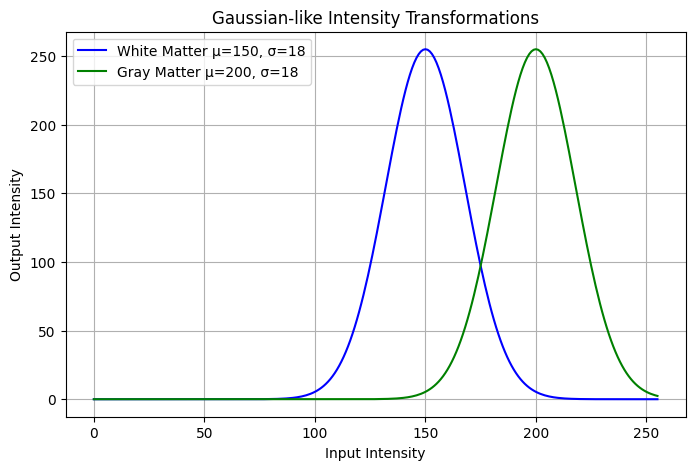

In [245]:
# Parameters
mu_wm, sigma_wm = 150, 18  # white matter
mu_gm, sigma_gm = 200, 18  # gray matter

# Intensity range
x = np.linspace(0, 255, 256)

# Gaussian transformation functions
T_wm = np.exp(-((x - mu_wm) ** 2) / (2 * sigma_wm ** 2))
T_gm = np.exp(-((x - mu_gm) ** 2) / (2 * sigma_gm ** 2))

# Normalize to 0-255
T_wm = (T_wm / T_wm.max()) * 255
T_gm = (T_gm / T_gm.max()) * 255

# Plot
plt.figure(figsize=(8, 5))
plt.plot(I, T_wm, label=f"White Matter μ={mu_wm}, σ={sigma_wm}", color='blue')
plt.plot(I, T_gm, label=f"Gray Matter μ={mu_gm}, σ={sigma_gm}", color='green')
plt.title("Gaussian-like Intensity Transformations")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.grid(True)
plt.show()

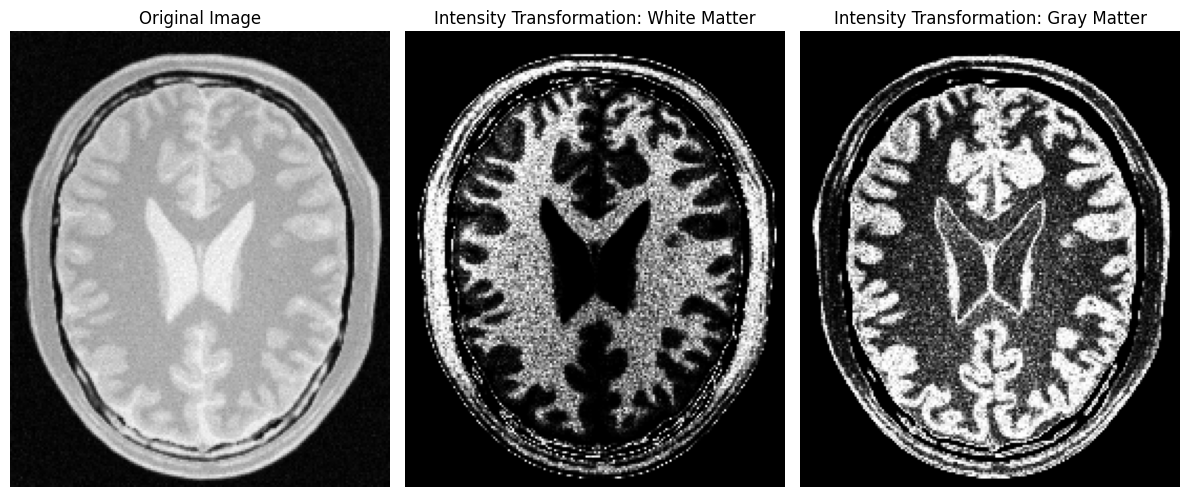

In [246]:
white_transform = T_wm[brain]
gray_transform =T_gm[brain]

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].imshow(brain, cmap="gray")
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(white_transform, cmap="gray")
ax[1].set_title('Intensity Transformation: White Matter')
ax[1].axis("off")
ax[2].imshow(gray_transform, cmap="gray")
ax[2].set_title('Intensity Transformation: Gray Matter')
ax[2].axis("off")

plt.tight_layout()
plt.show()

## 3. Applying Gamma Correction

In [247]:
# Load grayscale image
img_orig = cv.imread('a1images/highlights_and_shadows.jpg')
assert img_orig is not None
img_rgb = cv.cvtColor( img_orig, cv.COLOR_BGR2RGB)
img_ceilab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab) # Convert the image into CEILAB color space  




In [248]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(img_ceilab)

# Define and apply gamma transformation
gamma = 0.75
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t) # Apply gamma correction only for L channel

 # Merge L channel with other channels
merged = cv.merge([L_modified, a, b])
img_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)



In [249]:
# Display the images
fig, ax = plt.subplots(1, 4, figsize=(12,6))

ax[0].imshow(img_rgb, cmap="gray")
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(L, cmap="gray")
ax[1].set_title('L Channel')
ax[1].axis("off")
ax[2].imshow(a, cmap="gray")
ax[2].set_title('A Channel')
ax[2].axis("off")
ax[3].imshow(b, cmap="gray")
ax[3].set_title('B Channel')
ax[3].axis("off")

plt.tight_layout()
plt.show()


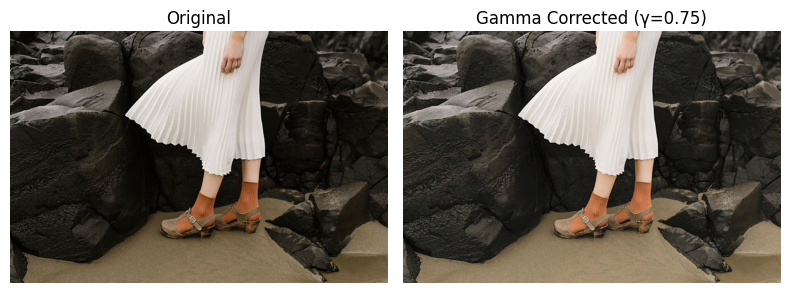

In [250]:
# Display the images
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].imshow(img_rgb)
axs[0].set_title('Original')
axs[0].axis('off') 

axs[1].imshow(img_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  

plt.tight_layout()
plt.show()

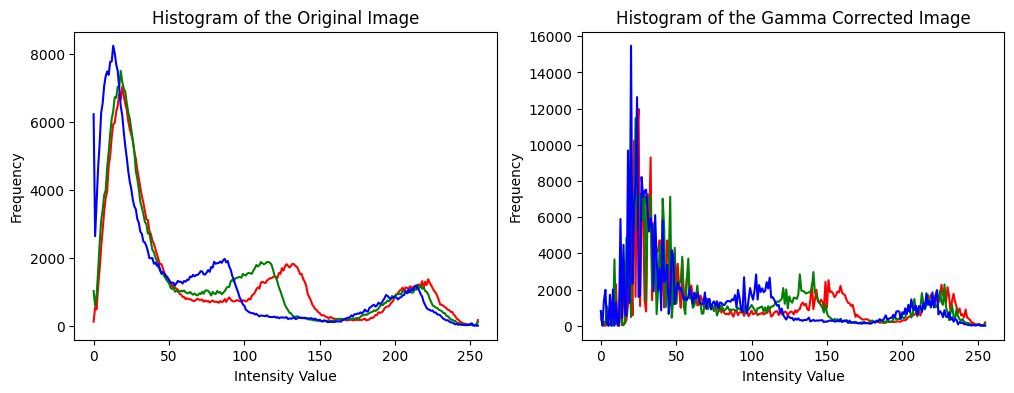

In [251]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, col in enumerate(space):
    hist_orig = cv.calcHist([img_rgb], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    ax[0].set_title('Histogram of the Original Image')
    ax[0].set_xlabel('Intensity Value')
    ax[0].set_ylabel('Frequency')
    hist_gamma = cv.calcHist([img_modified], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])
    ax[1].set_title('Histogram of the Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')
plt.show()

## 4. Increasing the Vibrance of a Photograph by Intensity Transformation

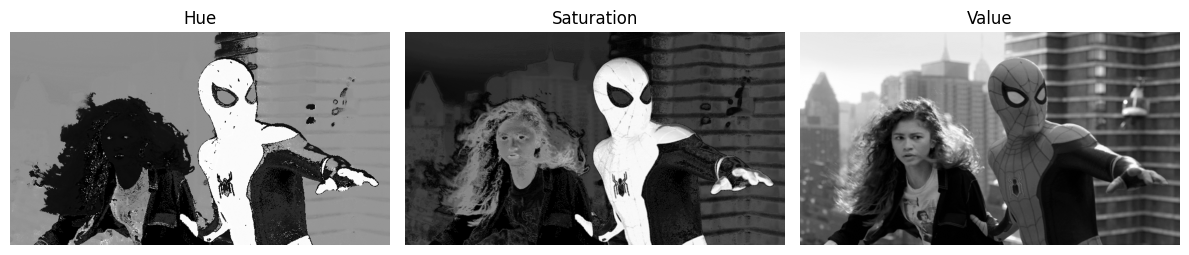

In [252]:
spider_bgr = cv.imread('a1images/spider.png')
assert spider_bgr is not None
spider_hsv = cv.cvtColor(spider_bgr, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider_bgr, cv.COLOR_BGR2RGB)

# Split into planes
Hue, Saturation, Value = cv.split(spider_hsv)
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue,cmap='gray')
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray')
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

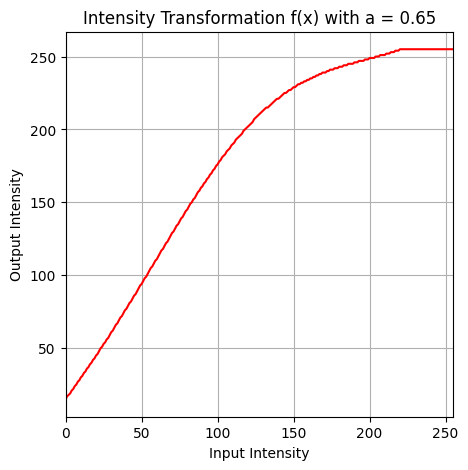

In [253]:
# Create vibrance transformation
a = 0.65
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Plot transformation curve
plt.figure(figsize=(5, 5))
plt.plot(x, f, color='red')
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity' )
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [254]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(Saturation, f)

# Merge modified S back and convert to RGB
merged = cv.merge([Hue, S_modified, Value])
spider_vibrance_rgb = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

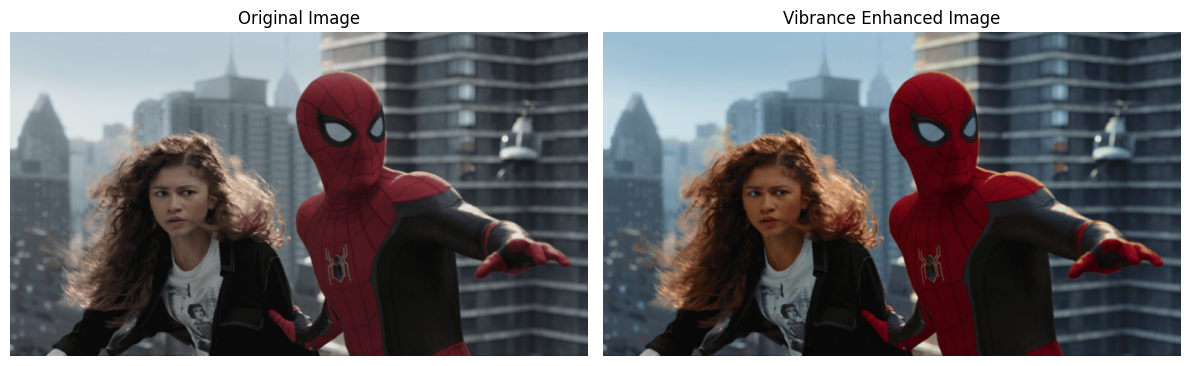

In [255]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the Original Image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off') 

# Plot the Vibrance Enhanced Image
axs[1].imshow(spider_vibrance_rgb)
axs[1].set_title('Vibrance Enhanced Image')
axs[1].axis('off')  

# Show the plot
plt.tight_layout()
plt.show()

## 5. Histogram Equalization

In [256]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None


def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()
    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)

    return t[f]


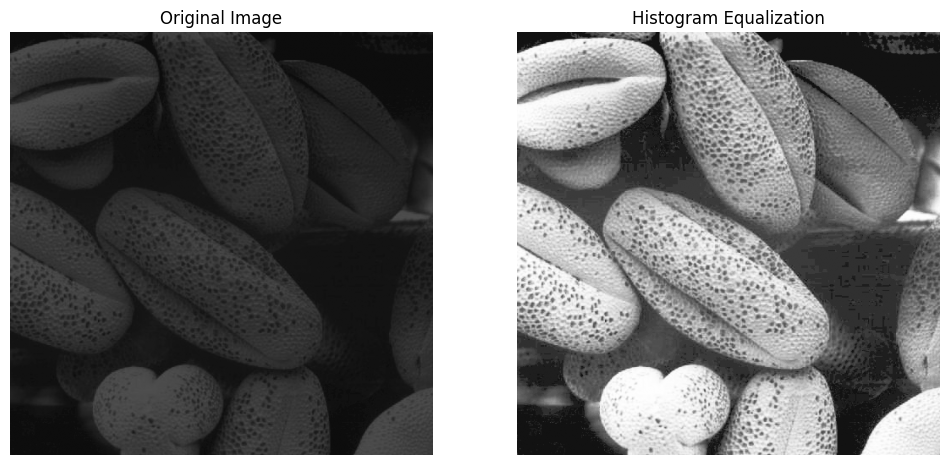

In [257]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

# Show the plot
plt.show()



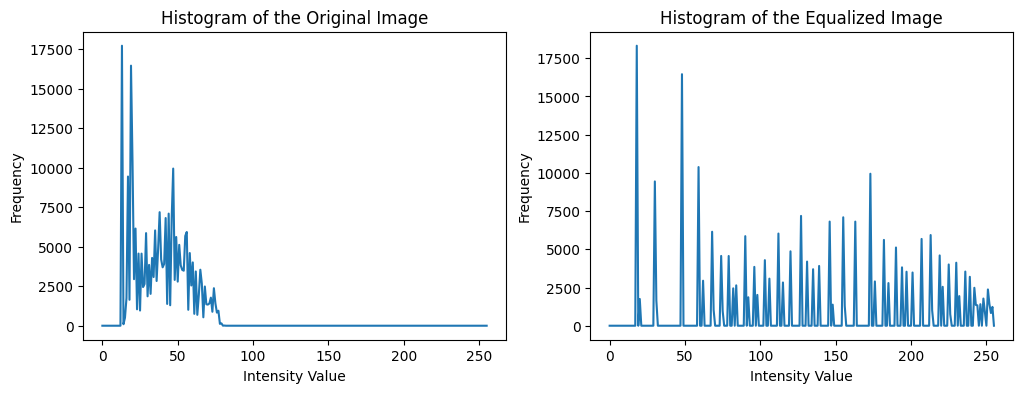

In [258]:
# Compute the histograms for both images
hist3 = cv.calcHist([shells], [0], None, [256], [0, 256])     # Calculate the histogram of the original image
equalized = histogram_equalization(shells)
hist4 = cv.calcHist([equalized], [0], None, [256], [0, 256])      # Calculate the histogram of the equalized image

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist3)
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist4)
ax[1].set_title('Histogram of the Equalized Image')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()



## 6. Histogram Equalization to Make Histogram Equlaized Foreground

### a) Open and split the image into hue, saturation and value planes

In [297]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
Hue, Saturation, Value = cv.split(jennifer_hsv)

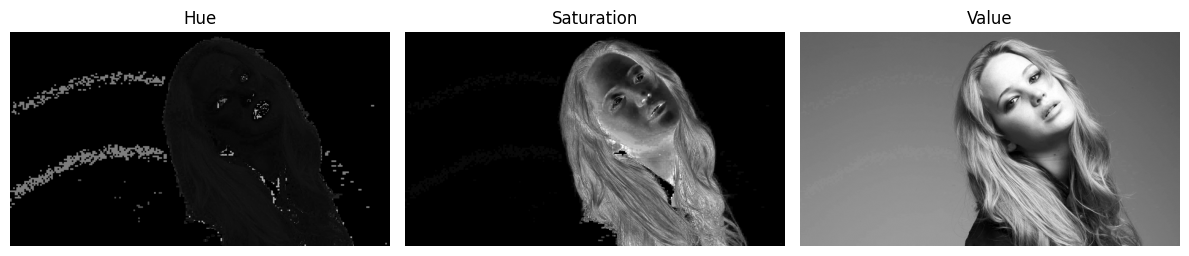

In [298]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

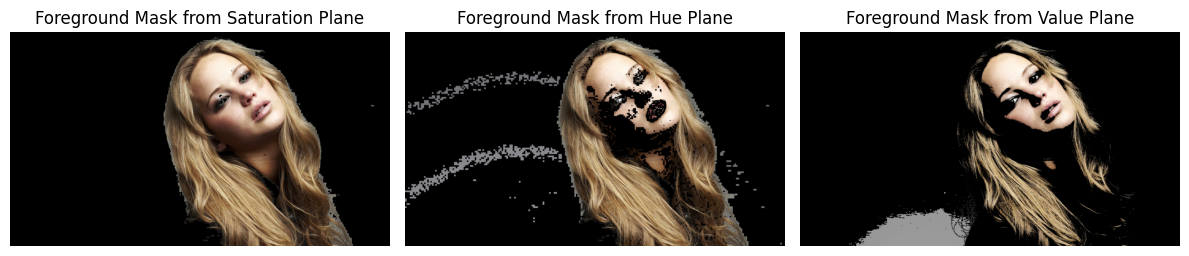

In [315]:
# Apply thresholding 
_, mask1 = cv.threshold(Saturation, 12, 255, cv.THRESH_BINARY)
_, mask2 = cv.threshold(Hue, 10, 255, cv.THRESH_BINARY)
_, mask3 = cv.threshold(Value, 150, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground1 = cv.bitwise_and(jennifer, jennifer, mask=mask1)
foreground2 = cv.bitwise_and(jennifer, jennifer, mask=mask2)
foreground3 = cv.bitwise_and(jennifer, jennifer, mask=mask3)

# Display the extracted foreground
fig, axs = plt.subplots(1, 3, figsize=(12, 8))


axs[0].imshow(cv.cvtColor(foreground1, cv.COLOR_BGR2RGB))
axs[0].set_title('Foreground Mask from Saturation Plane')
axs[0].axis('off') 


axs[1].imshow(cv.cvtColor(foreground2, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Mask from Hue Plane')
axs[1].axis('off')  

axs[2].imshow(cv.cvtColor(foreground3, cv.COLOR_BGR2RGB))
axs[2].set_title('Foreground Mask from Value Plane')
axs[2].axis('off') 

plt.tight_layout()
plt.show()

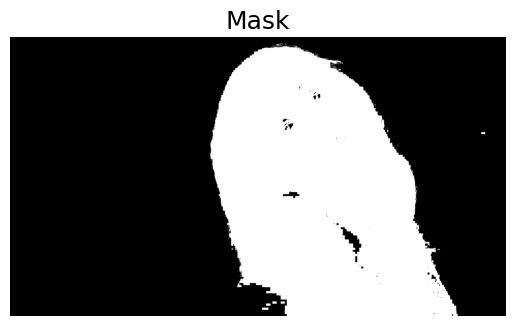

In [349]:
plt.imshow(mask1, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

### Using value channel

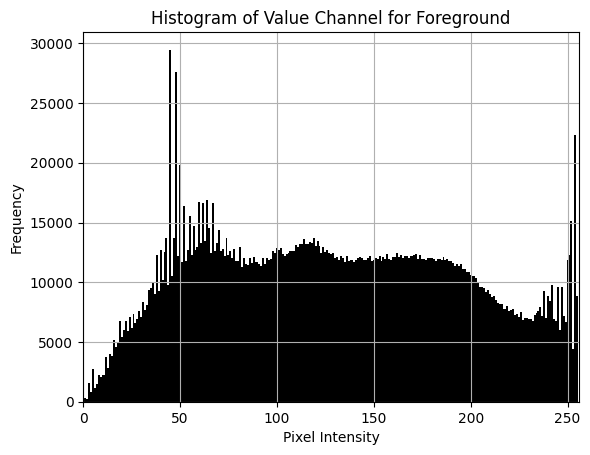

In [360]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground1, cv.COLOR_BGR2HSV)
Hue_fg, Saturation_fg, Value_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([Value_fg], [0], mask1, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

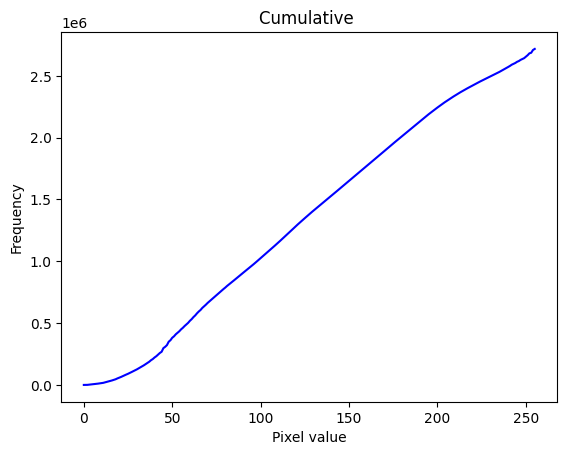

In [361]:
cumulative_hist = np.cumsum(hist)
cdf = hist.cumsum()
#region
plt.figure()

plt.plot(cumulative_hist, color='blue')
plt.title('Cumulative ')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')


plt.show()

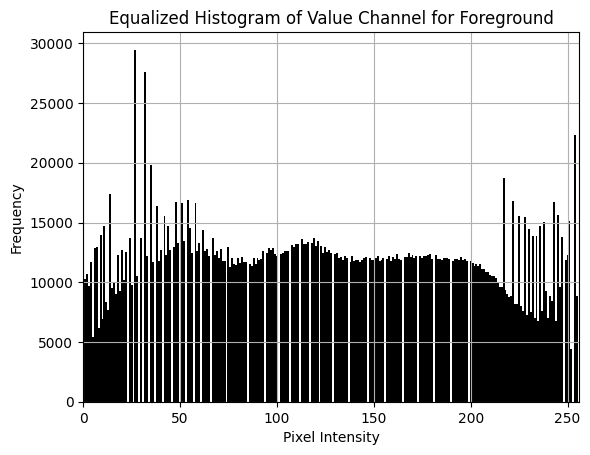

In [363]:
# Number of pixels
pixels = cdf[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[Value_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask1, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

In [364]:
# Merge
merged = cv.merge([Hue_fg, Saturation_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

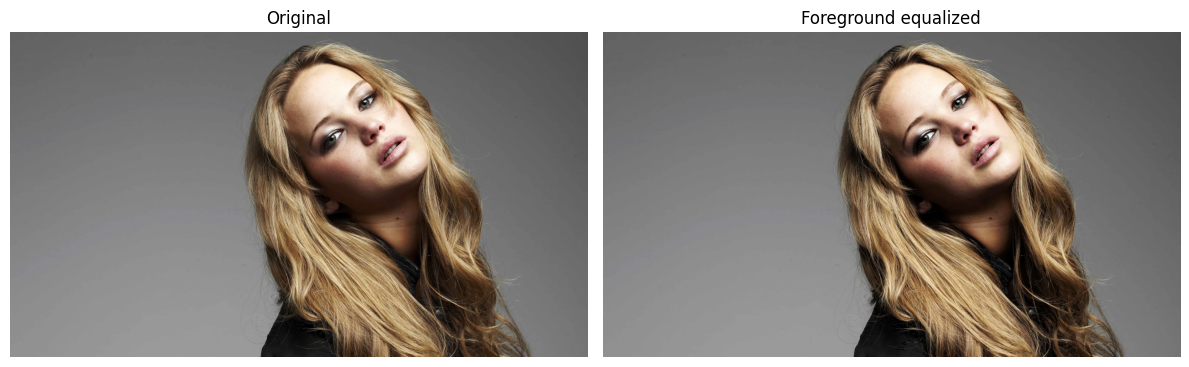

In [366]:
# Extract the background
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask1))

# Merge the equalized foreground and background
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(jennifer_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(result)
axs[1].set_title('Foreground equalized')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()